In [1]:
using Pkg

In [2]:
Pkg.add("CSV")
using CSV

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [27]:
df = CSV.read("ebola-virus.csv");

In [5]:
Pkg.add("Dates")
using Dates
Dates.DateTime(df[1,1], "d u y")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


2015-11-25T00:00:00

In [6]:
Date(df[1,1], "d u y")

2015-11-25

In [7]:
dateCol = df[:, 1]
dateCol[1]

"25 Nov 2015"

In [8]:
convertedDates = []
for i = 1:54
    push!(convertedDates, DateTime(dateCol[i], "d u y"))
end

In [9]:
convertedDates

54-element Array{Any,1}:
 2015-11-25T00:00:00
 2015-11-18T00:00:00
 2015-11-11T00:00:00
 2015-11-04T00:00:00
 2015-10-25T00:00:00
 2015-10-18T00:00:00
 2015-10-11T00:00:00
 2015-09-27T00:00:00
 2015-09-20T00:00:00
 2015-09-13T00:00:00
 2015-09-06T00:00:00
 2015-08-30T00:00:00
 2015-08-16T00:00:00
 ⋮                  
 2014-08-09T00:00:00
 2014-07-30T00:00:00
 2014-07-23T00:00:00
 2014-07-14T00:00:00
 2014-07-02T00:00:00
 2014-06-17T00:00:00
 2014-05-27T00:00:00
 2014-05-12T00:00:00
 2014-05-01T00:00:00
 2014-04-14T00:00:00
 2014-03-31T00:00:00
 2014-03-22T00:00:00

In [10]:
Dates.datetime2rata(convertedDates[1])

735927

In [11]:
dayssincemar22(x) = Dates.datetime2rata(x) - Dates.datetime2rata(convertedDates[54])
epidays = Int64[]
for i = 1:54
    push!(epidays, dayssincemar22(convertedDates[i]))
end

In [96]:
df[:, 1] = epidays
sort!(df)

,Date,total_cases,total_deaths,guinea_cases,guinea_deaths,liberia_cases,liberia_deaths,sierraleone_cases,sierraleone_deaths
,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,0,49,29,49,29,–,–,–,–
2,9,130,82,122,80,8,2,–,–
3,23,176,110,168,108,8,2,–,–
4,40,239,160,226,149,13,11,-,-
5,51,260,182,248,171,12,11,–,–
6,66,309,202,281,186,12,11,16,5
7,87,528,337,398,264,33,24,97,49
8,102,779,481,412,305,115,75,252,101
9,114,982,613,411,310,174,106,397,197


In [97]:
CSV.write("ebola-virus-epidays.csv", df)

"ebola-virus-epidays.csv"

In [100]:
dfEpidays = CSV.read("ebola-virus-epidays.csv");
sort!(dfEpidays);

In [16]:
Pkg.add("Plots")
using Plots

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [101]:
epidays = dfEpidays[:, 1]
allcases = dfEpidays[:, 2];

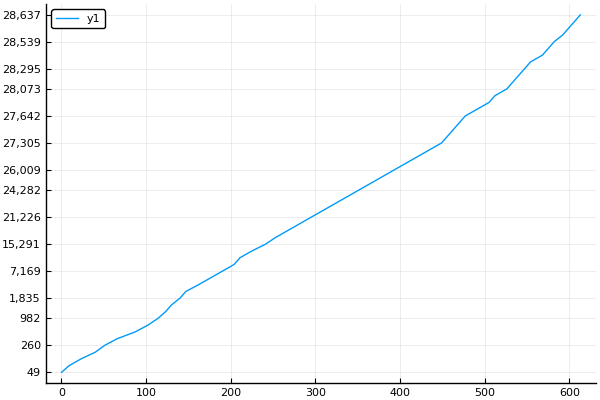

In [102]:
plot(epidays, allcases)

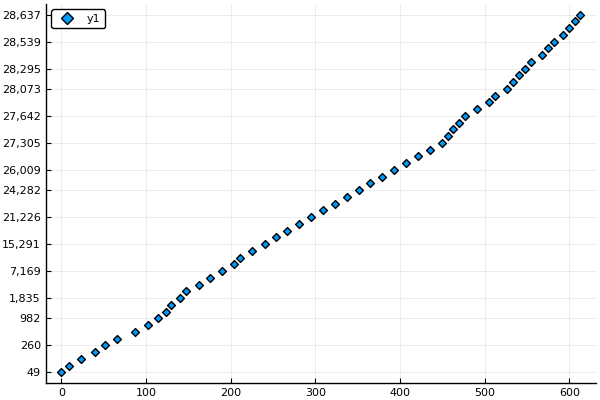

In [103]:
plot(epidays, allcases, linetype = :scatter, marker = :diamond)

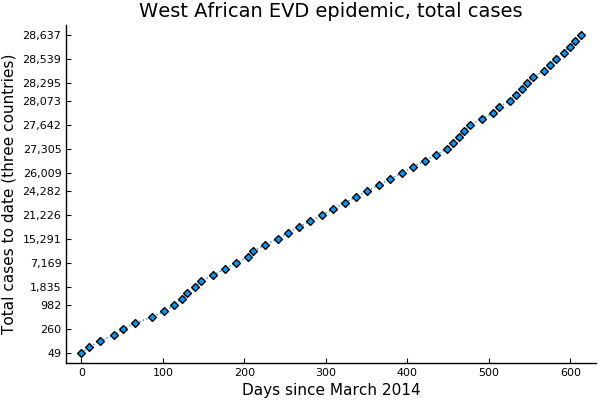

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1102
└ @ Plots /home/anderson/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:1102


In [104]:
plot(epidays, allcases, # here are the data to plot
    title = "West African EVD epidemic, total cases",
    xlabel = "Days since March 2014",
    ylabel = "Total cases to date (three countries)",
    marker = (:diamond, 4),
    line = (:path, :dot),
    legend = false,
    grid = false
)

In [105]:
savefig("ebola-virus-epidays.png")

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _show(::IOStream, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1343
└ @ Plots /home/anderson/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:1343
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _show(::IOStream, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1343
└ @ Plots /home/anderson/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:1343
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _show(::IOStream, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1343
└ @ Plots /home/anderson/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:1343


In [106]:
rows, cols = size(dfEpidays)

(54, 9)

In [59]:
3 == "–"

false

In [107]:
for j = 1:cols
    for i = 1:rows
        if dfEpidays[i, j] == "–"
            dfEpidays[i, j] = "0"
        end
    end
end

In [108]:
dfEpidays[53, :]

,Date,total_cases,total_deaths,guinea_cases,guinea_deaths,liberia_cases,liberia_deaths,sierraleone_cases,sierraleone_deaths
,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
53,606,"28,634","11,314","3,804","2,536","10,672","4,808","14,122","3,955"


In [109]:
epidays = dfEpidays[:, 1]
EVDcasesbycountry = dfEpidays[:, [4, 6, 8]]
typeof(EVDcasesbycountry)

DataFrames.DataFrame

In [110]:
sort!(EVDcasesbycountry)

,guinea_cases,liberia_cases,sierraleone_cases
,String⍰,String⍰,String⍰
1,"1,157","3,696","2,317"
2,"1,472","4,249","3,252"
3,"1,54","4,665","3,706"
4,"1,731","6,525","4,759"
5,122,8,0
6,168,8,0
7,"2,047","7,082","6,19"
8,"2,164","7,653","7,312"
9,"2,415","7,819","8,356"


In [111]:
guinea_cases = EVDcasesbycountry[:, 1]
liberia_cases = EVDcasesbycountry[:, 2]
sierraleone_cases = EVDcasesbycountry[:, 3];

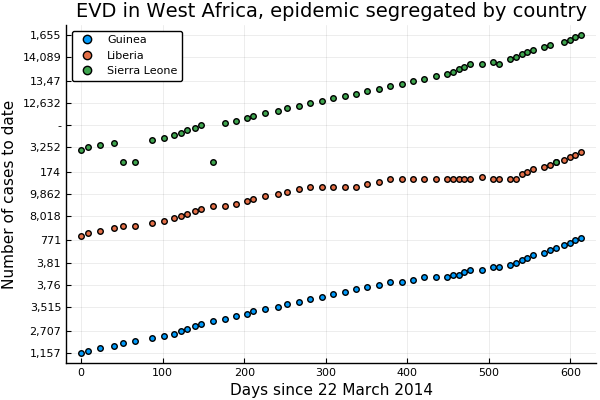

In [112]:
plot(epidays, [guinea_cases, liberia_cases, sierraleone_cases],
    label = ["Guinea" "Liberia" "Sierra Leone"],
    title = "EVD in West Africa, epidemic segregated by country",
    xlabel = "Days since 22 March 2014",
    ylabel = "Number of cases to date",
    line = (:scatter)
)

(-5, 36)
(-4, 15)
(-3, 0)
(-2, -9)
(-1, -12)
(0, -9)
(1, 0)
(2, 15)
(3, 36)
(4, 63)
(5, 96)


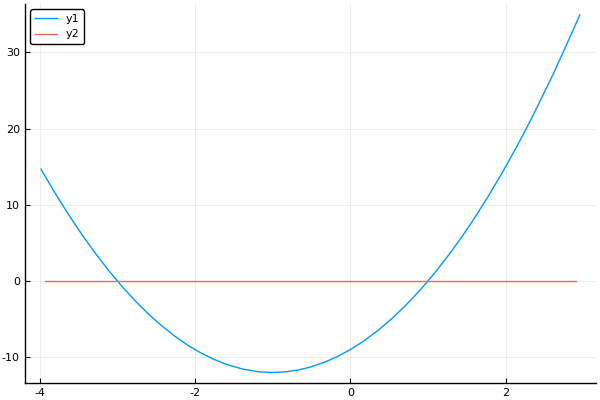

In [117]:
f(x) = 3 * x^2 + 6 * x - 9
for x = -5:5    
  println("(",x, ", ", f(x), ")")
end
using Plots
plot(f, -4, 3) # plot f over [-4,4]
plot!(zero, -4, 3)

In [118]:
f(1)

0

In [128]:
data = [1.6800483  -1.641695388; 
        0.501309281 -0.977697538; 
        1.528012113 0.52771122;
        1.70012253 1.711524991; 
        1.992493625 1.891000015;
        2.706075824 -0.463427794;
        2.994931927 -0.443566619;
        3.491852811 -1.275179133;
        3.501191722 -0.690499597;
        4.459924502 -5.516130799;
        4.936965851 -6.001703074;
        5.023289852 -8.36416901;
        5.04233698 -7.924477517;
        5.50739285 -10.77482371;
        5.568665171 -10.9171878]
using Plots
x,y = data[:,1]; data[:, 2]

0.501309281

In [132]:
z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
z[end-3:end]

4-element Array{Int64,1}:
 17
 18
 19
 20

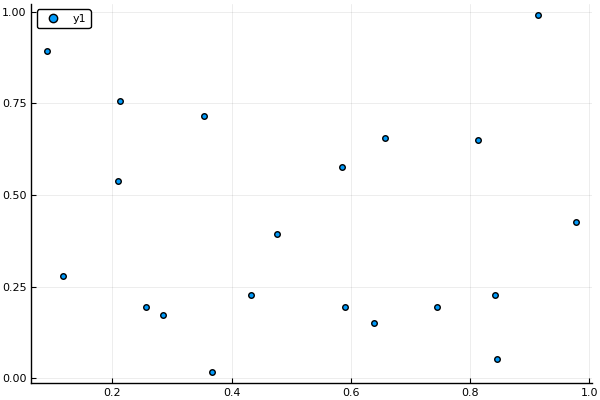

In [133]:
n = 20
x = sort(rand(20)); y = rand(20)
Plots.scatter(x, y)

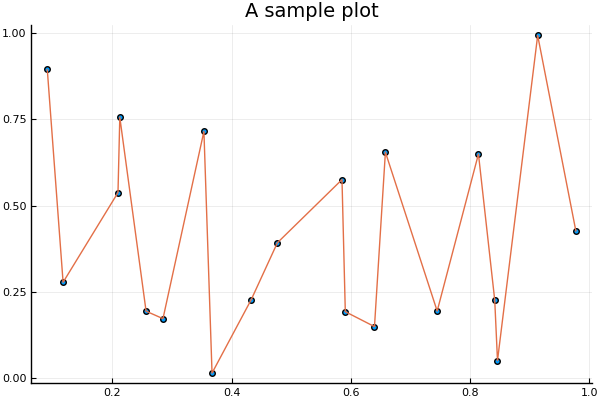

In [134]:
plot!(x,y, leg=false, title = "A sample plot")